In [2]:
import pandas as pd

In [31]:
vacancies_2020 = pd.read_csv('data/vacancies_2020.csv')
vacancies_2024 = pd.read_csv('data/vacancies_2024.csv')

vacancies_2020_saved = vacancies_2020.copy()
vacancies_2024_saved = vacancies_2024.copy()

In [33]:
vacancies_2020 = vacancies_2020_saved.copy()
vacancies_2024 = vacancies_2024_saved.copy()

              id                                        description  \
1331    38960875  <p>Набор на курсы</p> <p>09.2020-10.2020</p> <...   
2359    39340414  <p>Компания «Сбербанк Технологии» сейчас в пои...   
2387    39340749  <p>Уже более восьми лет мы погружаемся в тему ...   
2388    39340769  <p>Уже более восьми лет мы погружаемся в тему ...   
2392    39340785  <p>Уже более восьми лет мы погружаемся в тему ...   
...          ...                                                ...   
581963  38033408  <p>Мы находимся в поиске Data Engineer&#39;a в...   
582107  38034886  <p><strong>BP Mobile</strong> - компания, кото...   
582456  38037678  <p><em>Ищем опытного <strong>Аналитика</strong...   
582489  38037985  <p>Медиалогия разрабатывает высоконагруженные ...   
582537  38038853  <p>В связи с расширением портфеля задач мы отк...   

                                               key_skills schedule_id  \
1331                  Node.js\nHTML\nCSS\nJavaScript\nGit     fullDay   
2

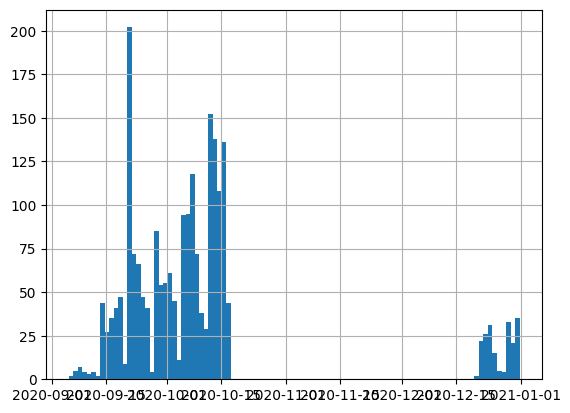

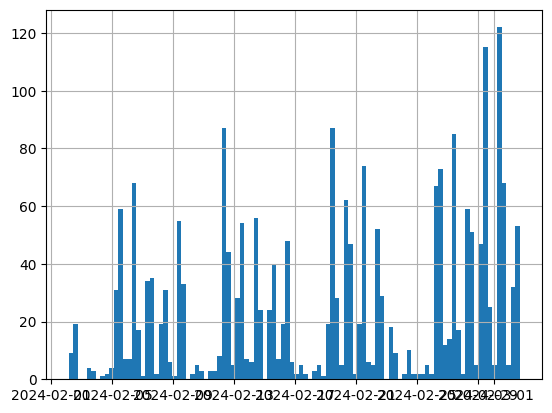

In [39]:
vacancies_2020 = vacancies_2020[vacancies_2020['name'].str.contains('Data scientist|Data analyst|ML|AI|Machine Learning|Artificial Intelligence|Аналитик данных|Data Engineer|Инженер данных|Reinforcement learning|Аналитик-исследователь|Нейросеть|Искусственный интеллект|Машинное обучение', case=False, na=False)]

# drop archived vacancies
vacancies_2020 = vacancies_2020[vacancies_2020['archived'] == False]
vacancies_2024 = vacancies_2024[vacancies_2024['archived'] == False]

print(vacancies_2020)
print(vacancies_2024)
print(vacancies_2020['area_id'].nunique())
print(vacancies_2024['area'].nunique())

# minimum and maximum published_at
print(vacancies_2020['published_at'].min())
print(vacancies_2020['published_at'].max())
print(vacancies_2024['published_at'].min())
print(vacancies_2024['published_at'].max())

# plot the distribution of published_at
import matplotlib.pyplot as plt

# use x as the date and y as the count of vacancies
vacancies_2020['published_at'] = pd.to_datetime(vacancies_2020['published_at'])
vacancies_2024['published_at'] = pd.to_datetime(vacancies_2024['published_at'])

vacancies_2020['published_at'].hist(bins=100)
plt.show()

vacancies_2024['published_at'].hist(bins=100)
plt.show()

In [11]:
# print 3 rows with all columns for both dataframes, not just some columns
cols = vacancies_2020.columns
for col in cols:
    print(col)
    print(vacancies_2020[col].head(3))

print(vacancies_2020.info())

id
0    30711158
1    30711538
2    30713109
Name: id, dtype: int64
description
0    <p><strong>О Компании</strong></p> <p>Мы помог...
1    <p><strong>Vigrom</strong> сегодня – междунаро...
2    <p>Каждый день миллионы пользователей находят ...
Name: description, dtype: object
key_skills
0                                                  NaN
1    PHP\nSQL\nООП\nPostgreSQL\nMemcached\nSymfony\...
2                                                  NaN
Name: key_skills, dtype: object
schedule_id
0    fullDay
1    fullDay
2     remote
Name: schedule_id, dtype: object
schedule_name
0         Полный день
1         Полный день
2    Удаленная работа
Name: schedule_name, dtype: object
accept_handicapped
0    False
1    False
2     True
Name: accept_handicapped, dtype: bool
accept_kids
0    False
1    False
2    False
Name: accept_kids, dtype: bool
experience_id
0    between1And3
1    between1And3
2    noExperience
Name: experience_id, dtype: object
experience_name
0    От 1 года до 3 лет
1    О

In [12]:
cols = vacancies_2024.columns
for col in cols:
    print(col)
    print(vacancies_2024[col].head(3))

print(vacancies_2024.info())

Unnamed: 0
0    0
1    1
2    2
Name: Unnamed: 0, dtype: int64
id
0    93622523
1    93990706
2    94024428
Name: id, dtype: int64
premium
0    False
1    False
2    False
Name: premium, dtype: bool
name
0    Специалист по работе с данными (Excel) / Анали...
1                                         Data Analyst
2    Аналитик по обработке данных (удалённо, проект...
Name: name, dtype: object
department
0    NaN
1    NaN
2    NaN
Name: department, dtype: object
has_test
0    False
1    False
2    False
Name: has_test, dtype: bool
response_letter_required
0    False
1    False
2    False
Name: response_letter_required, dtype: bool
area
0    {'id': '1', 'name': 'Москва', 'url': 'https://...
1    {'id': '2', 'name': 'Санкт-Петербург', 'url': ...
2    {'id': '1', 'name': 'Москва', 'url': 'https://...
Name: area, dtype: object
salary
0    {'from': 170000, 'to': 170000, 'currency': 'RU...
1    {'from': 60000, 'to': 80000, 'currency': 'RUR'...
2    {'from': 80000, 'to': 80000, 'currency': 'RUR

In [56]:
print(vacancies_2024['employer'].head(50))
print(vacancies_2020['employer_id'].head(50))
print(vacancies_2020['employer_name'].head(50))
# check if for the same id in 2020 and 2024 the name is the same in both dataframes (parse for 2024 as it's a json)
def get_columns_from_json(df, column_name, needed_columns):
    df[column_name] = df[column_name].apply(lambda x: eval(x) if pd.notnull(x) else x)
    for i, column in enumerate(needed_columns):
        df[f'{column_name}_{column}'] = df[column_name].apply(lambda x: x[column] if pd.notnull(x) else x)
    df = df.drop(columns=[column_name])
    return df

# vacancies_2024 = get_columns_from_json(vacancies_2024, 'employer', ['id', 'name'])
# flag = True
# for i in range(len(vacancies_2020)):
#     if vacancies_2020['employer_id'][i] == vacancies_2024['employer_id'][i]:
#         if vacancies_2020['employer_name'][i] != vacancies_2024['employer_name'][i]:
#             flag = False
#             print(f'employer_id: {vacancies_2020["employer_id"][i]} - 2020: {vacancies_2020["employer_name"][i]} - 2024: {vacancies_2024["employer_name"][i]}')

0     {'id': '9182604', 'name': 'ЦУГАМ', 'url': 'htt...
1     {'id': '660353', 'name': 'LoyaltyPlant', 'url'...
2     {'id': '907345', 'name': 'ЛУКОЙЛ', 'url': 'htt...
3     {'id': '852361', 'name': 'Ростелеком - Центры ...
4     {'id': '1626408', 'name': 'Федеральное автоном...
5     {'id': '1887728', 'name': 'REVO Capital LLC', ...
6     {'id': '11632', 'name': 'DSM Group', 'url': 'h...
7     {'id': '1959760', 'name': 'Контакт Перфоманс',...
8     {'id': '2730772', 'name': 'BestDoctor', 'url':...
9     {'id': '2730772', 'name': 'BestDoctor', 'url':...
10    {'id': '6067730', 'name': '1221Системс', 'url'...
11    {'id': '5418368', 'name': 'Рекрутинговое агент...
12    {'id': '5125701', 'name': 'Премиум Импорт', 'u...
13    {'id': '124', 'name': 'Coleman Group', 'url': ...
14    {'id': '4366867', 'name': 'Афонина Анна Георги...
15    {'id': '3261800', 'name': '1СЕО', 'url': 'http...
16    {'id': '579', 'name': 'Кофемания', 'url': 'htt...
17    {'id': '1959176', 'name': 'Акира Оил', 'ur

KeyError: 'id'

In [60]:
# all columns that not mentioned are dropped

# 'premium' - don't change
# 'name' - don't change
# 'department' - take id and name (from 2024) and department_id and department_name (from 2020)
# 'has_test' - don't change
# 'response_letter_required' - don't change
# 'area' - get only id and name (from j2024) and area_id and area_name (from 2020)
# 'salary' - get all columns (from 2024) and salary_from, salary_to, salary_currency, salary_gross (from 2020)
# 'type' - get only id (from 2024) and type_id (from 2020)
# 'address' - reformat to get only bool value if it's not null for 2024 and drop for 2020, adding a new column 'is_address' with the bool value
# 'published_at' - don't change
# 'archived' - don't change
# 'insider_interview' - reformat to get only bool value if it's not null for 2024 and drop for 2020, adding a new column 'is_insider_interview' with the bool value


adjusted_2020 = vacancies_2020[['premium', 'name', 'department_id', 'department_name', 'area_id', 'area_name', 'has_test', 'response_letter_required', 'salary_from', 'salary_to', 'salary_currency', 'salary_gross', 'type_id', 'address_city', 'published_at', 'archived', 'insider_interview', 'employer_id', 'employer_name']]
adjusted_2024 = vacancies_2024[['premium', 'name', 'department', 'area', 'has_test', 'response_letter_required', 'salary', 'type', 'address', 'published_at', 'archived', 'insider_interview', 'employer']]

def get_columns_from_json(df, column_name, needed_columns):
    df[column_name] = df[column_name].apply(lambda x: eval(x) if pd.notnull(x) else x)
    for i, column in enumerate(needed_columns):
        df[f'{column_name}_{column}'] = df[column_name].apply(lambda x: x[column] if pd.notnull(x) else x)
    df = df.drop(columns=[column_name])
    return df

adjusted_2024 = get_columns_from_json(adjusted_2024, 'department', ['id', 'name'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'area', ['id', 'name'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'salary', ['from', 'to', 'currency', 'gross'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'type', ['id'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'employer', ['id', 'name'])

adjusted_2024['is_address'] = adjusted_2024['address'].notnull()
adjusted_2024 = adjusted_2024.drop(columns=['address'])
adjusted_2020['is_address'] = adjusted_2020['address_city'].notnull()
adjusted_2020 = adjusted_2020.drop(columns=['address_city'])
adjusted_2024['is_insider_interview'] = adjusted_2024['insider_interview'].notnull()
adjusted_2024 = adjusted_2024.drop(columns=['insider_interview'])
adjusted_2020['is_insider_interview'] = adjusted_2020['insider_interview'].notnull()
adjusted_2020 = adjusted_2020.drop(columns=['insider_interview'])

print(adjusted_2024)

C:\Users\Bod\AppData\Local\Temp\ipykernel_12344\1461853561.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(lambda x: eval(x) if pd.notnull(x) else x)
C:\Users\Bod\AppData\Local\Temp\ipykernel_12344\1461853561.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column_name}_{column}'] = df[column_name].apply(lambda x: x[column] if pd.notnull(x) else x)
C:\Users\Bod\AppData\Local\Temp\ipykernel_12344\1461853561.py:23: SettingWithCopyWarning: 
A value is tryi

KeyError: 'id'